In [517]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Задание 1. Спектральное дифференцирование

In [518]:
a = 0.01

In [519]:
T = 200
dt = 0.01
t = np.linspace(-T / 2, T / 2, int(T / dt))

Text(0, 0.5, 'g(t)')

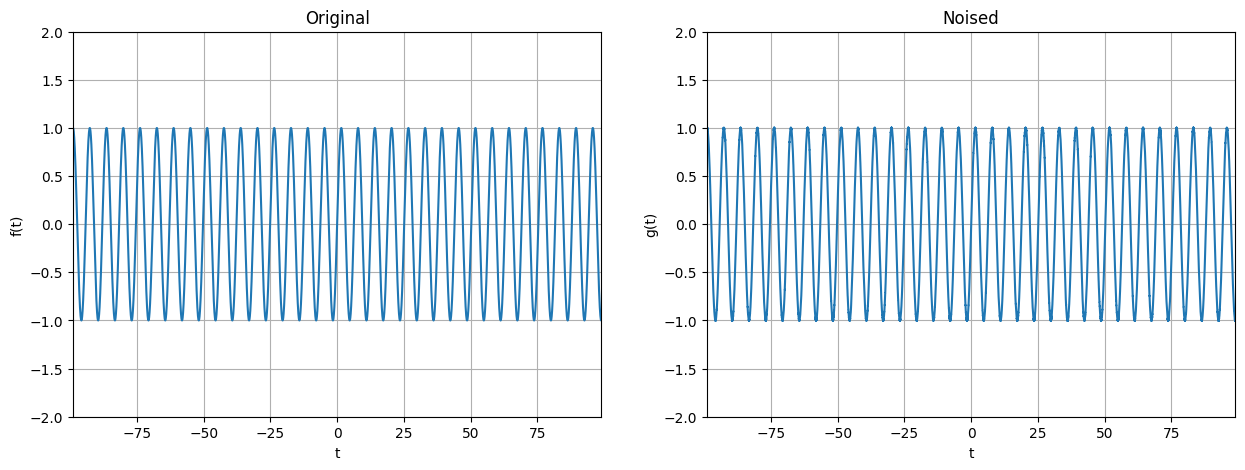

In [520]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
plt.sca(axs[0])
plt.title('Original')
plt.plot(t, np.sin(t))
plt.grid(True)
plt.ylim((-2, 2))
plt.xlim((-99, 99))
plt.xlabel('t')
plt.ylabel('f(t)')
plt.sca(axs[1])
plt.title('Noised')
plt.plot(t, np.sin(t) + a * (np.random.rand(len(t)) - 0.5))
plt.grid(True)
plt.ylim((-2, 2))
plt.xlim((-99, 99))
plt.xlabel('t')
plt.ylabel('g(t)')

## Численная производная

Text(0, 0.5, '$ \\frac{df(t)}{dt} $')

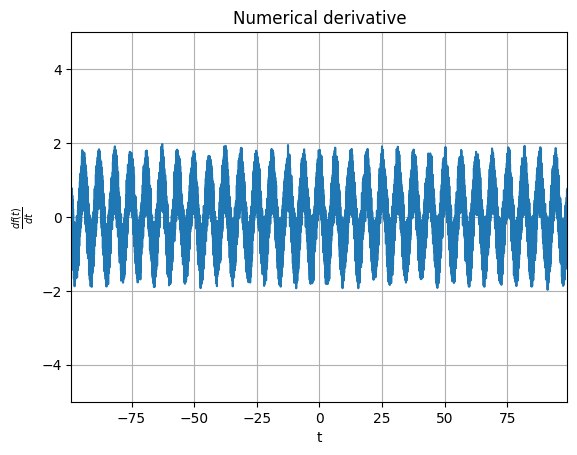

In [521]:
y = np.sin(t) + a * (np.random.rand(len(t)) - 0.5)
num_der = [(y[k + 1] - y[k]) / dt for k in range(len(t) - 1)]
plt.title('Numerical derivative')
plt.plot(t[:-1], num_der)
plt.grid(True)
plt.ylim((-5, 5))
plt.xlim((-99, 99))
plt.xlabel('t')
plt.ylabel('$ \\frac{df(t)}{dt} $')

## Спектральная производная

In [522]:
V = 1 / dt
dv = 1 / T
freq = np.linspace(-V / 2, V / 2, int(V / dv))

In [523]:
ft = np.array([np.trapz((np.sin(t) + a * (np.random.rand(len(t)) - 0.5)) * np.exp(-1j * 2 * np.pi * v * t), t) for v in freq])
ft_der = (1j * 2 * np.pi * freq) * ft

Text(0, 0.5, '$\\hat f(v)$')

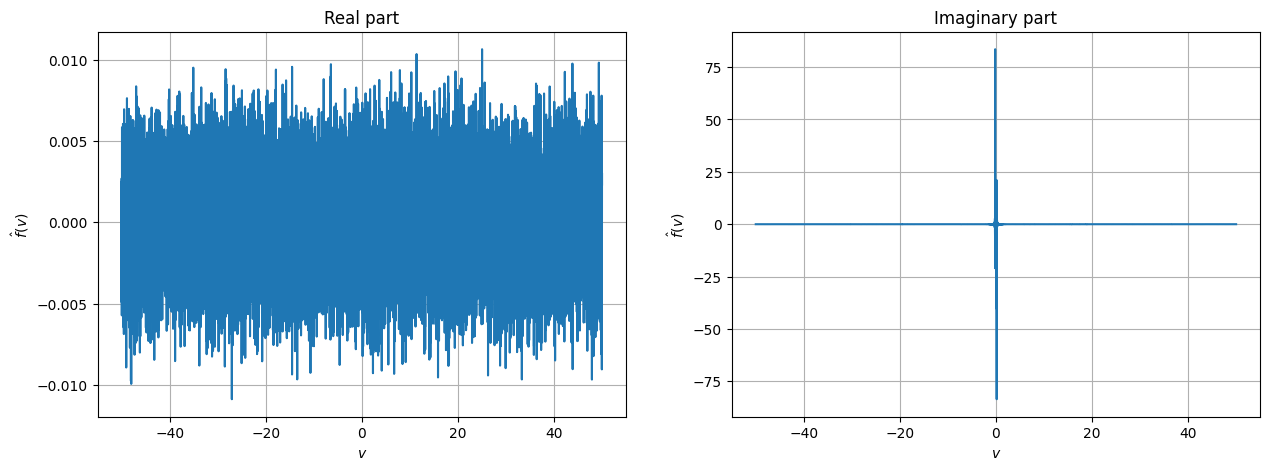

In [524]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
plt.sca(axs[0])
plt.title('Real part')
plt.plot(freq, np.real(ft))
plt.grid(True)
plt.xlabel('$v$')
plt.ylabel('$\\hat f(v)$')
plt.sca(axs[1])
plt.title('Imaginary part')
plt.plot(freq, np.imag(ft))
plt.grid(True)
plt.xlabel('$v$')
plt.ylabel('$\\hat f(v)$')

Text(0, 0.5, '$\\hat f(v)$')

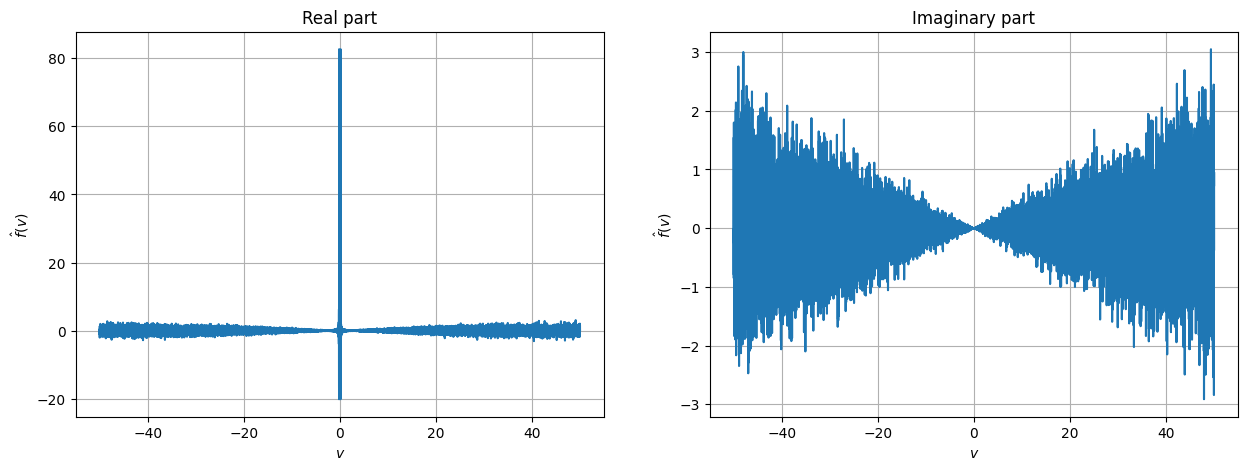

In [525]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
plt.sca(axs[0])
plt.title('Real part')
plt.plot(freq, np.real(ft_der))
plt.grid(True)
plt.xlabel('$v$')
plt.ylabel('$\\hat f(v)$')
plt.sca(axs[1])
plt.title('Imaginary part')
plt.plot(freq, np.imag(ft_der))
plt.grid(True)
plt.xlabel('$v$')
plt.ylabel('$\\hat f(v)$')

Text(0, 0.5, '$ \\frac{df(t)}{dt} $')

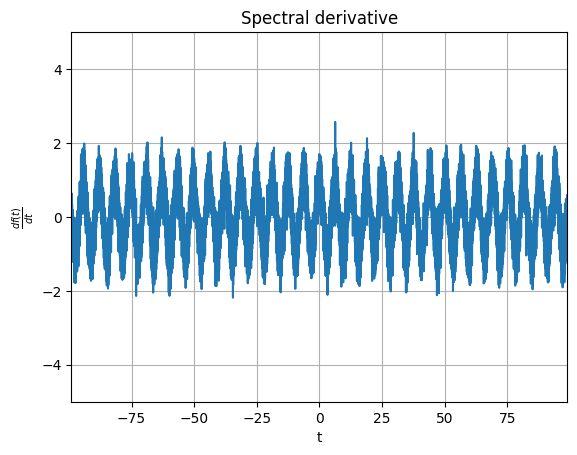

In [526]:
spec_der = np.array([np.trapz(ft_der * np.exp(1j * 2 * np.pi * freq * tt), freq) for tt in t])
plt.title('Spectral derivative')
plt.plot(t, spec_der)
plt.grid(True)
plt.ylim((-5, 5))
plt.xlim((-99, 99))
plt.xlabel('t')
plt.ylabel('$ \\frac{df(t)}{dt} $')

## Истинная производная

Text(0, 0.5, '$ \\frac{df(t)}{dt} $')

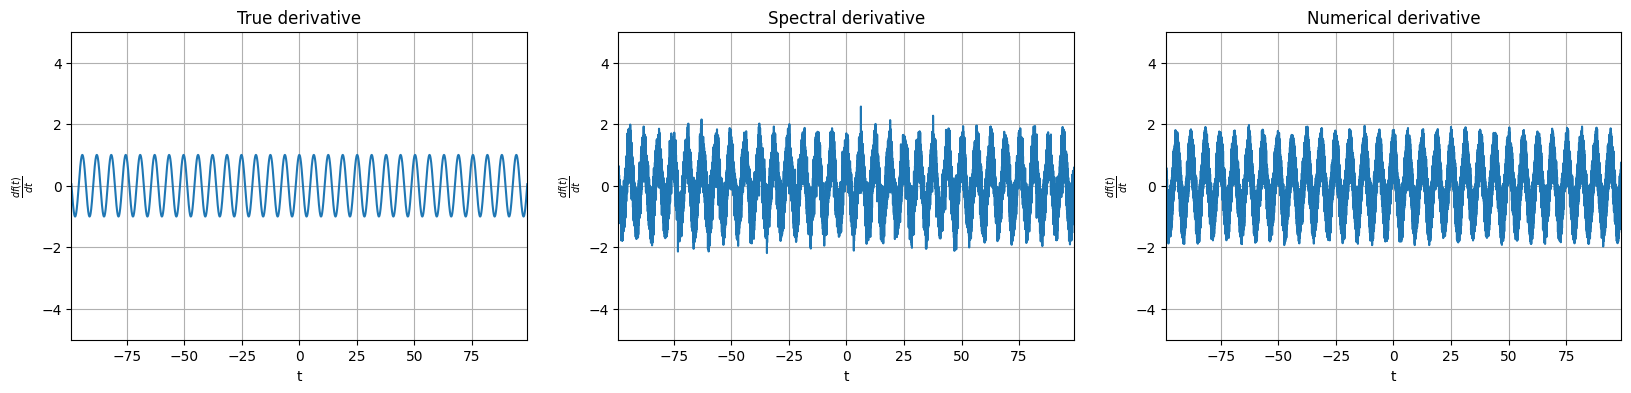

In [527]:
fig, axs = plt.subplots(1, 3, figsize = (20, 4))
plt.sca(axs[0])
plt.plot(t, np.cos(t))
plt.title('True derivative')
plt.grid(True)
plt.ylim((-5, 5))
plt.xlim((-99, 99))
plt.xlabel('t')
plt.ylabel('$ \\frac{df(t)}{dt} $')
plt.sca(axs[1])
plt.title('Spectral derivative')
plt.plot(t, spec_der)
plt.grid(True)
plt.ylim((-5, 5))
plt.xlim((-99, 99))
plt.xlabel('t')
plt.ylabel('$ \\frac{df(t)}{dt} $')
plt.sca(axs[2])
plt.title('Numerical derivative')
plt.plot(t[:-1], num_der)
plt.grid(True)
plt.ylim((-5, 5))
plt.xlim((-99, 99))
plt.xlabel('t')
plt.ylabel('$ \\frac{df(t)}{dt} $')

# Задание 2. Линейные фильтры

In [756]:
t1, t2 = 1, 4

In [757]:
def g(t, a):
    return np.piecewise(t, [(t1 <= t) & (t <= t2)], [a])

In [900]:
def u(t, a, b, c, d):
    return g(t, a) + b * (np.random.rand(len(t)) - 0.5) + c * np.sin(d * t)

## Фильтр первого порядка

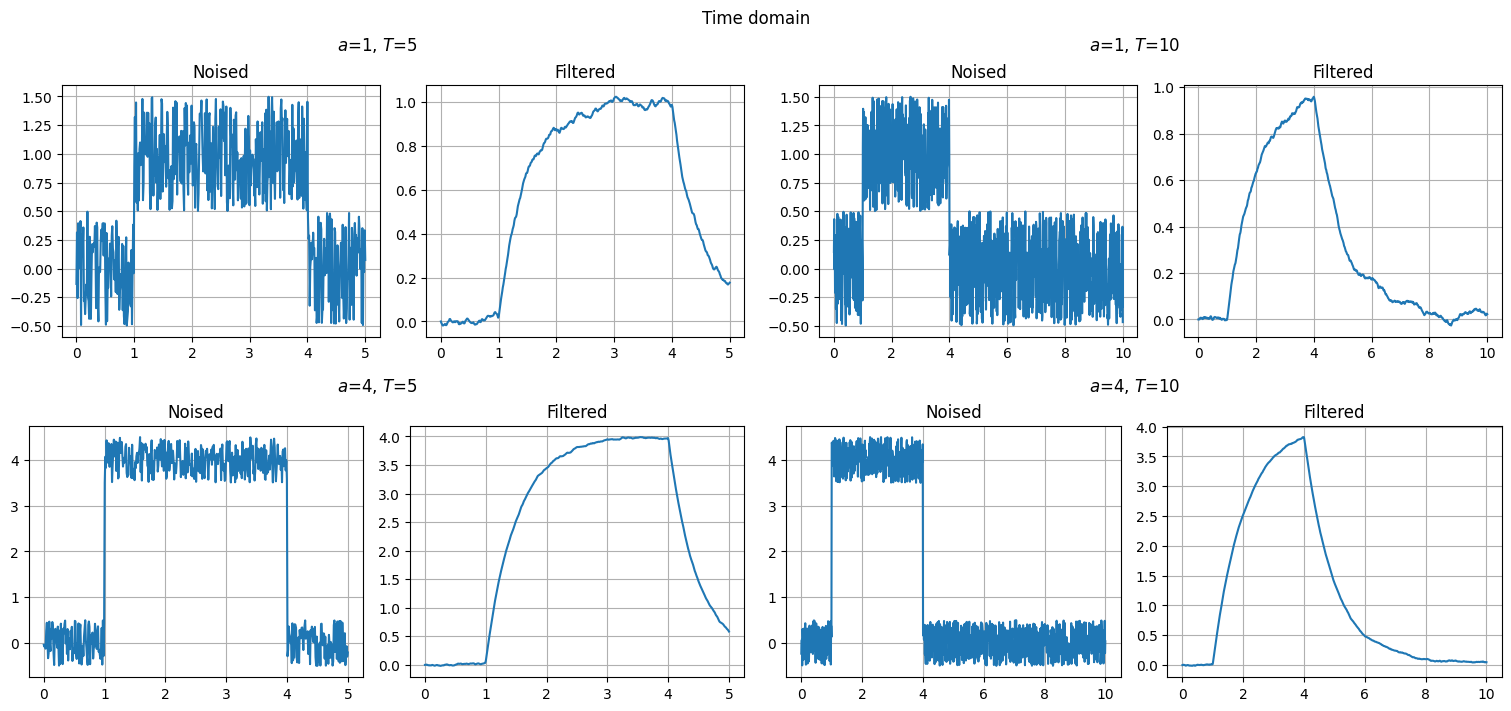

In [961]:
b, c, d = 1, 0, 0
A = [1, 1, 4, 4]
TT = [5, 10, 5, 10]

fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)

plt.suptitle('Time domain')

for outerind, subfig in enumerate(subfigs.flat):
    a = A[outerind]
    T = TT[outerind]

    dt = 0.01
    t = np.linspace(0, T, int(T / dt))
    subfig.suptitle(f'$a$={a}, $T$={T}')
    
    W = sp.signal.TransferFunction([1], [0.1 * T, 1])
    t_filt, f_filt, _ = sp.signal.lsim(W, u(t, a, b, c, d), t)

    axs = subfig.subplots(1, 2)
    plt.sca(axs[0])
    plt.title('Noised')
    plt.plot(t, u(t, a, b, c, d))
    plt.grid(True)
    plt.sca(axs[1])
    plt.title('Filtered')
    plt.plot(t_filt, f_filt)
    plt.grid(True)

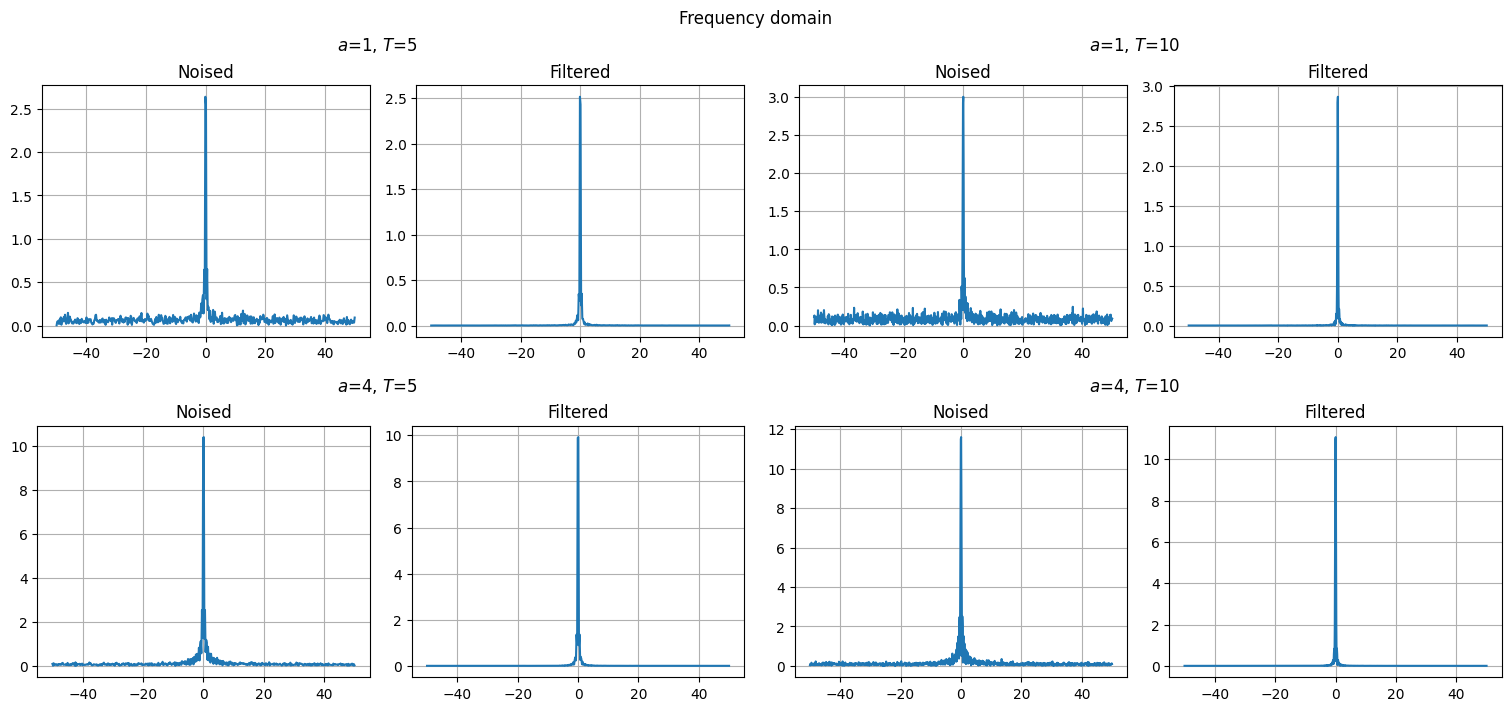

In [962]:
b, c, d = 1, 0, 0
A = [1, 1, 4, 4]
TT = [5, 10, 5, 10]

fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)

plt.suptitle('Frequency domain')

for outerind, subfig in enumerate(subfigs.flat):
    a = A[outerind]
    T = TT[outerind]

    dt = 0.01
    t = np.linspace(0, T, int(T / dt))
    V = 1 / dt
    dv = 1 / T
    freq = np.linspace(-V / 2, V / 2, int(V / dv))
    subfig.suptitle(f'$a$={a}, $T$={T}')
    
    W_freq = 1 / (0.1 * T * (2j * np.pi * freq) + 1)
    ft = np.array([np.trapz(u(t, a, b, c, d) * np.exp(-1j * 2 * np.pi * v * t), t) for v in freq])
    ft_filt = W_freq * ft

    axs = subfig.subplots(1, 2)
    plt.sca(axs[0])
    plt.title('Noised')
    plt.plot(freq, np.abs(ft))
    plt.grid(True)
    plt.sca(axs[1])
    plt.title('Filtered')
    plt.plot(freq, np.abs(ft_filt))
    plt.grid(True)

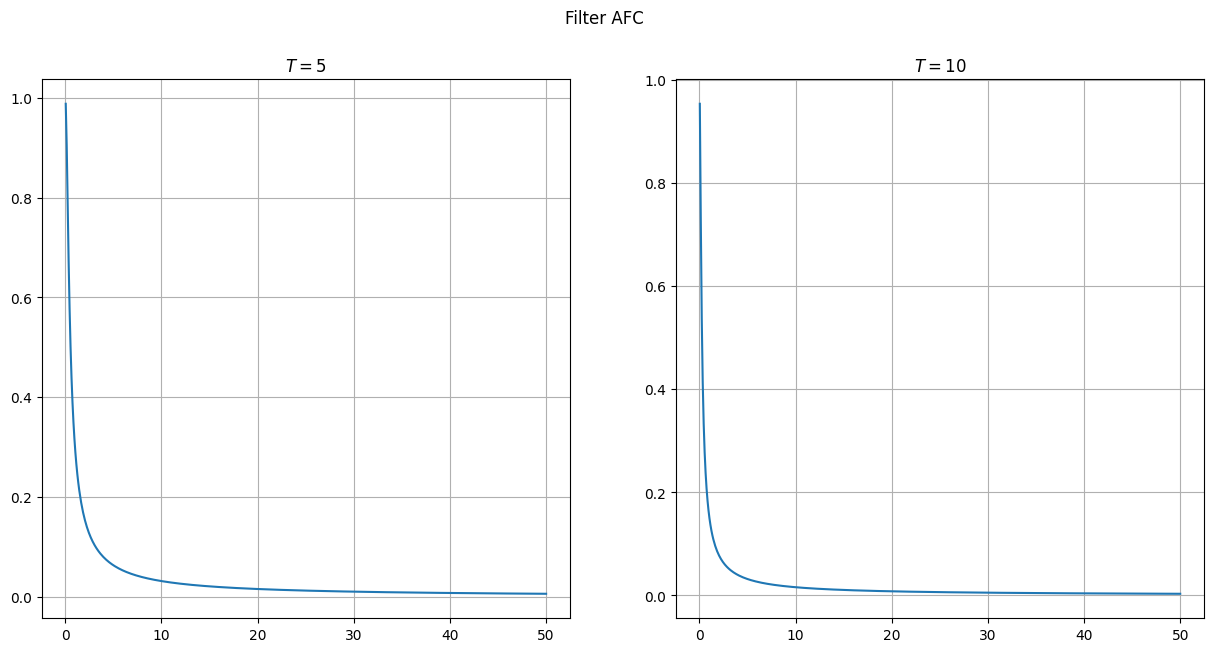

In [963]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.suptitle('Filter AFC')
plt.sca(axs[0])
T = 5
W_freq = 1 / (0.1 * T * (2j * np.pi * freq) + 1)
plt.title('$T = 5$')
plt.plot(freq[len(freq) // 2:], np.abs(W_freq[len(W_freq) // 2:]))
plt.grid(True)
plt.sca(axs[1])
T = 10
W_freq = 1 / (0.1 * T * (2j * np.pi * freq) + 1)
plt.title('$T = 10$')
plt.plot(freq[len(freq) // 2:], np.abs(W_freq[len(W_freq) // 2:]))
plt.grid(True)

## Специальный фильтр

In [933]:
T = 5
dt = 0.01
t = np.linspace(0, T, int(T / dt))
V = 1 / dt
dv = 1 / T
freq = np.linspace(-V / 2, V / 2, int(V / dv))

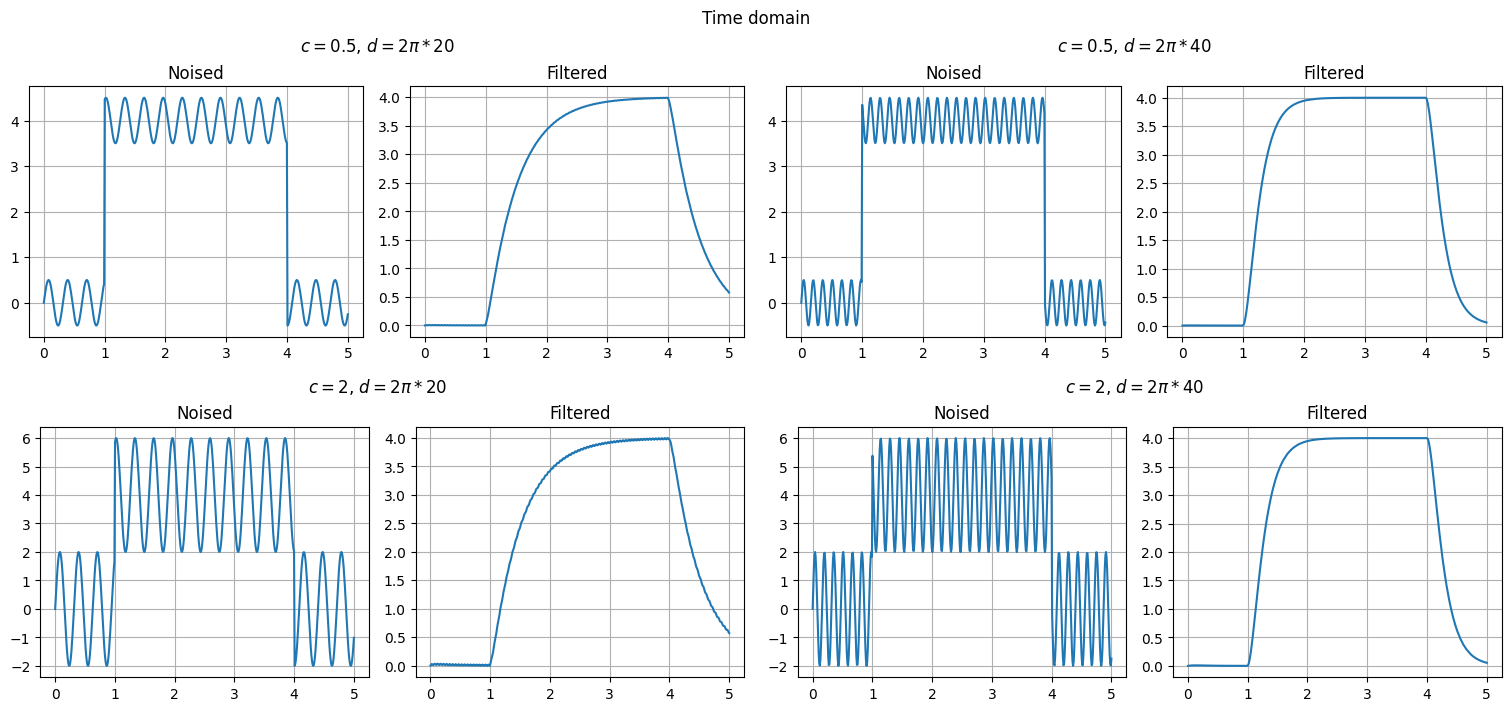

In [958]:
a, b = 4, 0
C = [0.5, 0.5, 2, 2]
D = [20, 40, 20, 40]
Tx = [(0.01, 0.5, 0.05), (0.001, 0.1, 0.2), (0.01, 0.5, 0.05), (0.001, 0.1, 0.2)]

fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)

plt.suptitle('Time domain')

for outerind, subfig in enumerate(subfigs.flat):
    c = C[outerind]
    d = D[outerind]
    T1, T2, T3 = Tx[outerind]

    subfig.suptitle(f'$c = {c}$, $d = 2\pi * {d}$')

    W = sp.signal.TransferFunction([T1 ** 2, 2 * T1, 1], [T2 * T3, (T2 + T3), 1])
    t_filt, f_filt, _ = sp.signal.lsim(W, u(t, a, b, c, d * 2 * np.pi), t)

    axs = subfig.subplots(1, 2)
    plt.sca(axs[0])
    plt.title('Noised')
    plt.plot(t, u(t, a, b, c, d))
    plt.grid(True)
    plt.sca(axs[1])
    plt.title('Filtered')
    plt.plot(t_filt, f_filt)
    plt.grid(True)

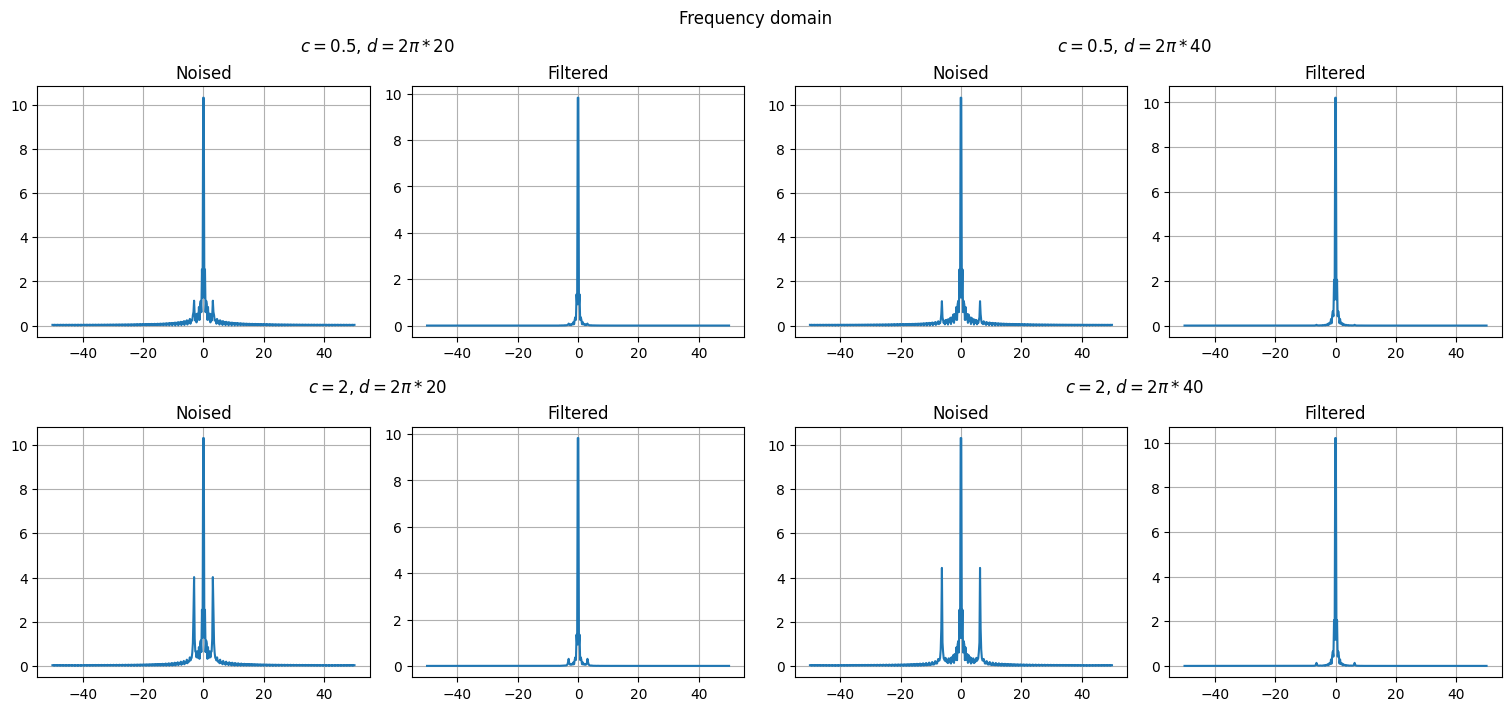

In [959]:
a, b = 4, 0
C = [0.5, 0.5, 2, 2]
D = [20, 40, 20, 40]
Tx = [(0.01, 0.5, 0.05), (0.001, 0.1, 0.2), (0.01, 0.5, 0.05), (0.001, 0.1, 0.2)]

fig = plt.figure(constrained_layout=True, figsize=(15, 7))
subfigs = fig.subfigures(2, 2)

plt.suptitle('Frequency domain')

for outerind, subfig in enumerate(subfigs.flat):
    c = C[outerind]
    d = D[outerind]
    T1, T2, T3 = Tx[outerind]

    subfig.suptitle(f'$c = {c}$, $d = 2\pi * {d}$')

    W_freq = (T1 ** 2 * (2j * np.pi * freq) ** 2 + 2 * T1 * (2j * np.pi * freq) + 1) / (T2 * T3 * (2j * np.pi * freq) ** 2 + (T2 + T3) * (2j * np.pi * freq) + 1)
    ft = np.array([np.trapz(u(t, a, b, c, d) * np.exp(-1j * 2 * np.pi * v * t), t) for v in freq])
    ft_filt = W_freq * ft

    axs = subfig.subplots(1, 2)
    plt.sca(axs[0])
    plt.title('Noised')
    plt.plot(freq, np.abs(ft))
    plt.grid(True)
    plt.sca(axs[1])
    plt.title('Filtered')
    plt.plot(freq, np.abs(ft_filt))
    plt.grid(True)

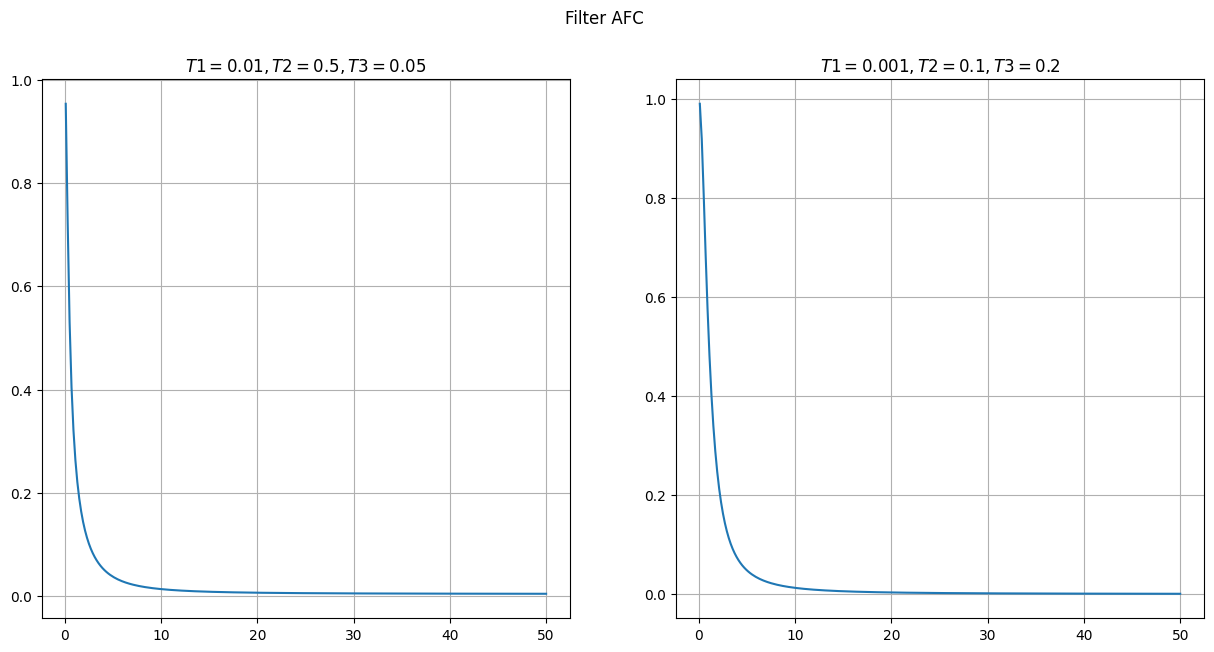

In [960]:
fig, axs = plt.subplots(1, 2, figsize = (15, 7))
plt.suptitle('Filter AFC')
plt.sca(axs[0])
T1, T2, T3 = (0.01, 0.5, 0.05)
W_freq = (T1 ** 2 * (2j * np.pi * freq) ** 2 + 2 * T1 * (2j * np.pi * freq) + 1) / (T2 * T3 * (2j * np.pi * freq) ** 2 + (T2 + T3) * (2j * np.pi * freq) + 1)
plt.title(f'$T1 = {T1}, T2 = {T2}, T3 = {T3}$')
plt.plot(freq[len(freq) // 2:], np.abs(W_freq[len(W_freq) // 2:]))
plt.grid(True)
plt.sca(axs[1])
T1, T2, T3 = (0.001, 0.1, 0.2)
W_freq = (T1 ** 2 * (2j * np.pi * freq) ** 2 + 2 * T1 * (2j * np.pi * freq) + 1) / (T2 * T3 * (2j * np.pi * freq) ** 2 + (T2 + T3) * (2j * np.pi * freq) + 1)
plt.title(f'$T1 = {T1}, T2 = {T2}, T3 = {T3}$')
plt.plot(freq[len(freq) // 2:], np.abs(W_freq[len(W_freq) // 2:]))
plt.grid(True)

# Задание 3. Сглаживание биржевый данных

In [546]:
import pandas as pd

In [570]:
df1 = pd.read_csv('AAPL_230419_230817.csv', sep=';')
df2 = pd.read_csv('AAPL_230818_231216.csv', sep=';')
df3 = pd.read_csv('AAPL_231217_240415.csv', sep=';')

In [571]:
df1

,<TICKER>,<PER>,<DATE>,<TIME>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,AAPL,60,230419,90000,165.750,166.51,165.56,166.17,240042
1,AAPL,60,230419,100000,166.145,167.20,166.14,166.91,321305
2,AAPL,60,230419,110000,166.950,167.78,166.92,167.57,290726
3,AAPL,60,230419,120000,167.620,168.15,167.41,167.86,188023
4,AAPL,60,230419,130000,167.850,168.08,167.63,167.81,157981
...,...,...,...,...,...,...,...,...,...
591,AAPL,60,230817,110000,174.110,174.65,173.83,174.63,229945
592,AAPL,60,230817,120000,174.640,175.06,174.43,175.06,202158
593,AAPL,60,230817,130000,175.070,175.09,174.09,174.23,173927
594,AAPL,60,230817,140000,174.220,174.34,173.72,173.97,222227


In [581]:
df1 = df1.merge(df2, how = 'outer')
df1 = df1.merge(df3, how = 'outer')
df = df1.drop('<TICKER>', axis = 1)
df = df.drop('<PER>', axis = 1)
df = df.drop('<TIME>', axis = 1)
df = df.drop('<DATE>', axis = 1)
df = df.drop('<OPEN>', axis = 1)
df = df.drop('<HIGH>', axis = 1)
df = df.drop('<LOW>', axis = 1)
df = df.drop('<VOL>', axis = 1)
df

,<CLOSE>
0,166.17
1,166.91
2,167.57
3,167.86
4,167.81
...,...
1754,176.00
1755,175.13
1756,173.90
1757,173.32


In [705]:
y = df.to_numpy()
y = y.reshape((len(y),))

In [706]:
T_day = 7
T_week = T_day * 5
T_month = T_week * 4
T_3month = T_month * 3
T_year = T_month * 12

## День

Text(0, 0.5, 'price')

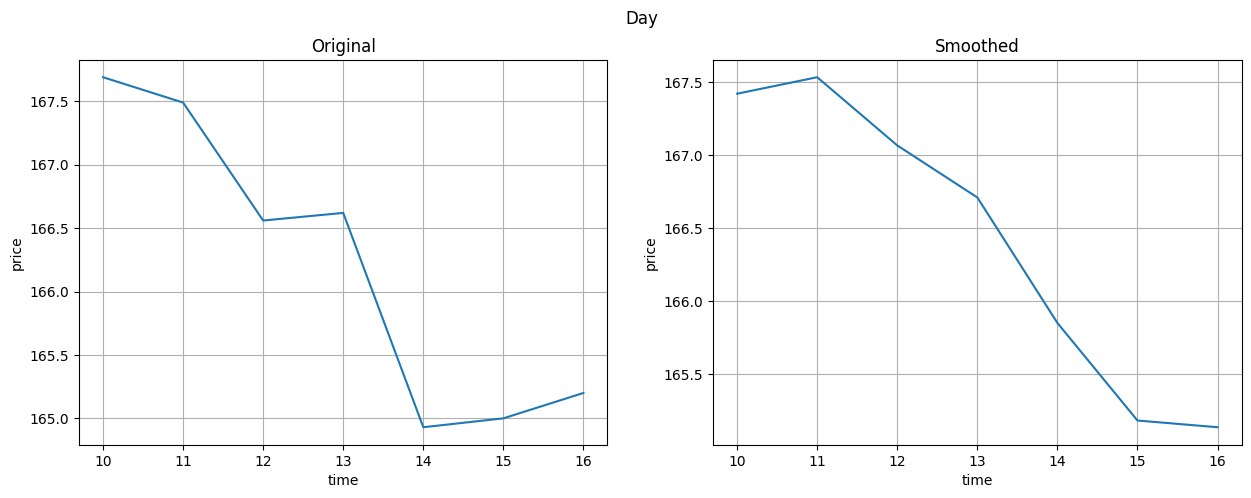

In [928]:
shift = 10
T = T_day
t = range(T + shift)
W = sp.signal.TransferFunction([1.0], [0.1 * float(T), 1.0])
t_filt, y_filt, x_filt = sp.signal.lsim(W, y[:len(t)], t)
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Day')
plt.sca(axs[0])
plt.title('Original')
plt.plot(t[shift:], y[shift:len(t)])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')
plt.sca(axs[1])
plt.title('Smoothed')
plt.plot(t_filt[shift:], y_filt[shift:])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')

## Неделя

Text(0, 0.5, 'price')

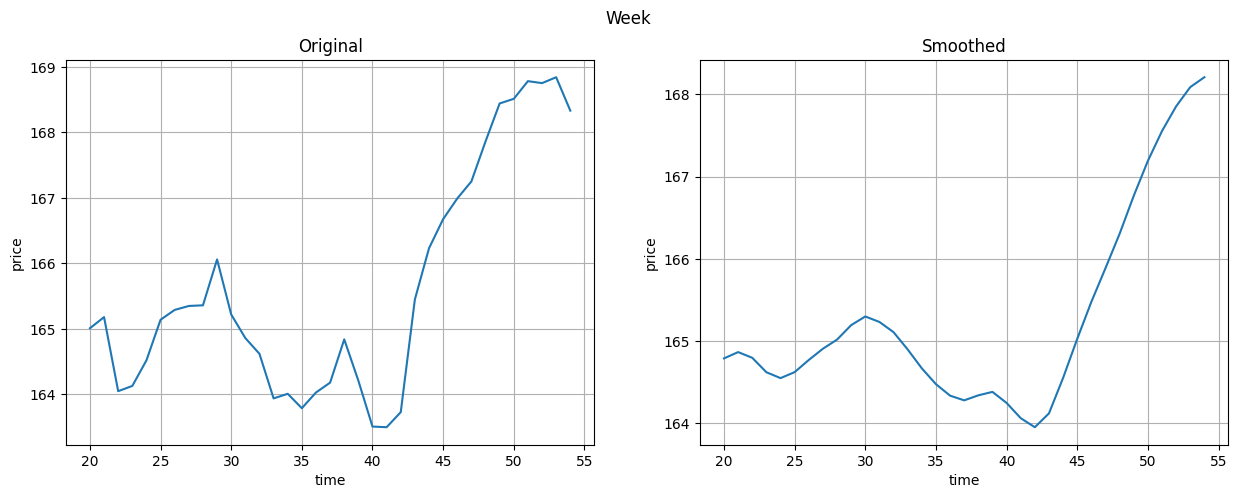

In [927]:
shift = 20
T = T_week
t = range(T + shift)
W = sp.signal.TransferFunction([1.0], [0.1 * float(T), 1.0])
t_filt, y_filt, x_filt = sp.signal.lsim(W, y[:len(t)], t)
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Week')
plt.sca(axs[0])
plt.title('Original')
plt.plot(t[shift:], y[shift:len(t)])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')
plt.sca(axs[1])
plt.title('Smoothed')
plt.plot(t_filt[shift:], y_filt[shift:])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')

## Месяц

Text(0, 0.5, 'price')

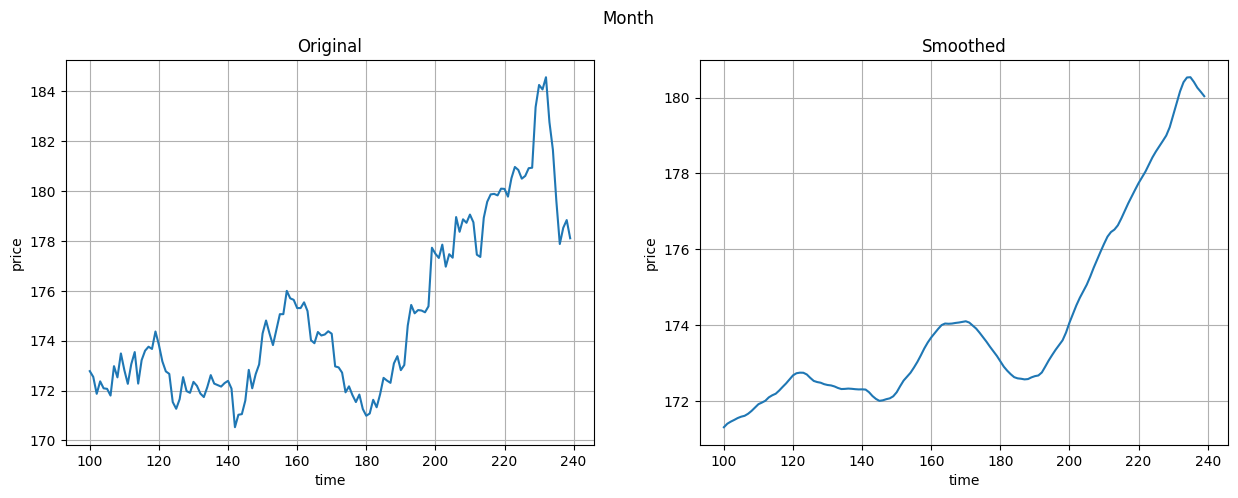

In [926]:
shift = 100
T = T_month
t = range(T + shift)
W = sp.signal.TransferFunction([1.0], [0.1 * float(T), 1.0])
t_filt, y_filt, x_filt = sp.signal.lsim(W, y[:len(t)], t)
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Month')
plt.sca(axs[0])
plt.title('Original')
plt.plot(t[shift:], y[shift:len(t)])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')
plt.sca(axs[1])
plt.title('Smoothed')
plt.plot(t_filt[shift:], y_filt[shift:])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')

## 3 месяца

Text(0, 0.5, 'price')

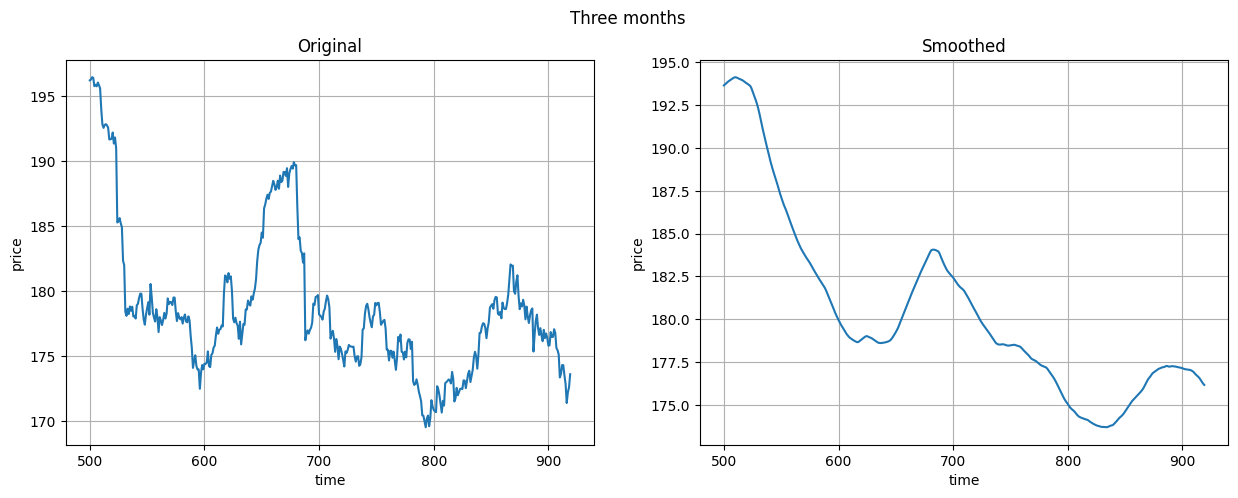

In [925]:
shift = 500
T = T_3month
t = range(T + shift)
W = sp.signal.TransferFunction([1.0], [0.1 * float(T), 1.0])
t_filt, y_filt, x_filt = sp.signal.lsim(W, y[:len(t)], t)
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Three months')
plt.sca(axs[0])
plt.title('Original')
plt.plot(t[shift:], y[shift:len(t)])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')
plt.sca(axs[1])
plt.title('Smoothed')
plt.plot(t_filt[shift:], y_filt[shift:])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')

## Год

Text(0, 0.5, 'price')

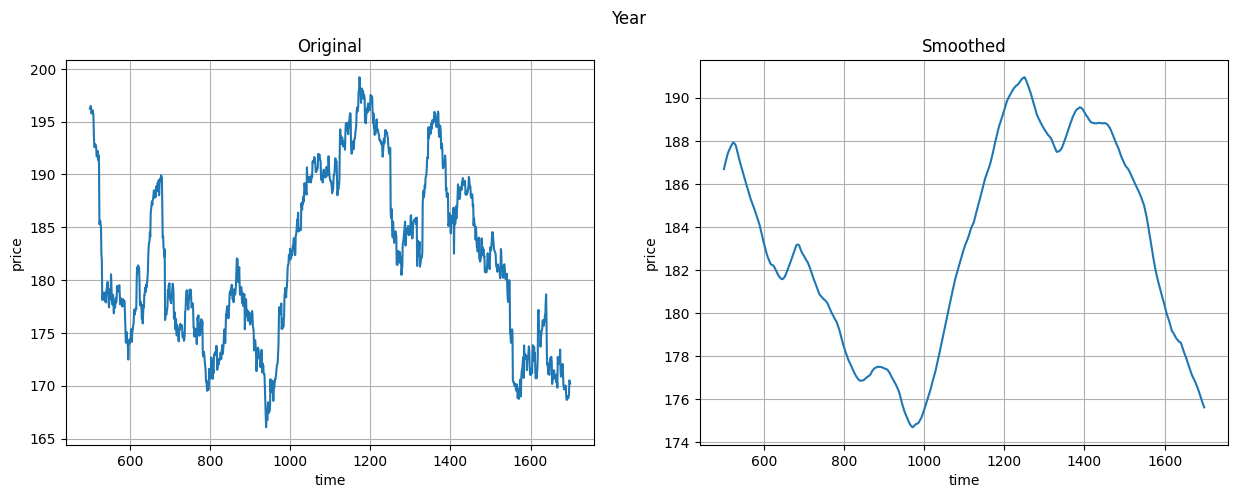

In [924]:
shift = 500
T = 1200
t = range(T + shift)
W = sp.signal.TransferFunction([1.0], [0.1 * float(T), 1.0])
t_filt, y_filt, x_filt = sp.signal.lsim(W, y[:len(t)], t)
fig, axs = plt.subplots(1, 2, figsize = (15, 5))
plt.suptitle('Year')
plt.sca(axs[0])
plt.title('Original')
plt.plot(t[shift:], y[shift:len(t)])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')
plt.sca(axs[1])
plt.title('Smoothed')
plt.plot(t_filt[shift:], y_filt[shift:])
plt.grid(True)
plt.xlabel('time')
plt.ylabel('price')